<a href="https://colab.research.google.com/github/Mallowsss/CCMACLRL_EXERCISES_COM222ML/blob/main/Exercise7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [792]:
pip install advertools

# Exercise 7: Hate Speech Classification using Multinomial Naive Bayes

Instructions:
- You do not need to split your data. Use the training, validation and test sets provided below.
- Use Multinomial Naive Bayes to train a model that can classify if a sentence is a hate speech or non-hate speech
- A sentence with a label of zero (0) is classified as non-hate speech
- A sentence with a label of one (1) is classified as a hate speech

Apply text pre-processing techniques such as
- Converting to lowercase
- Stop word Removal
- Removal of digits, special characters
- Stemming or Lemmatization but not both
- Count Vectorizer or TF-IDF Vectorizer but not both

Evaluate your model by:
- Providing input by yourself
- Creating a Confusion Matrix
- Calculating the Accuracy, Precision, Recall and F1-Score

In [793]:
import pandas as pd

In [794]:
splits = {'train': 'unique_train_dataset.csv', 'validation': 'unique_validation_dataset.csv', 'test': 'unique_test_dataset.csv'}

**Training Set**

Use this to train your model

In [795]:
df_train = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["train"])

**Validation Set**

Use this set to evaluate your model

In [796]:
df_validation = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["validation"])

**Test Set**
  
Use this set to test your model

In [797]:
df_test = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["test"])

## A. Understanding your training data

1. Check the first 10 rows of the training dataset

In [798]:
# put your answer here
print(df_train.head(10))

                                                text  label
0  Presidential candidate Mar Roxas implies that ...      1
1  Parang may mali na sumunod ang patalastas ng N...      1
2                    Bet ko. Pula Ang Kulay Ng Posas      1
3                               [USERNAME] kakampink      0
4  Bakit parang tahimik ang mga PINK about Doc Wi...      1
5  "Ang sinungaling sa umpisa ay sinungaling hang...      1
6                                          Leni Kiko      0
7  Nahiya si Binay sa Makati kaya dito na lang sa...      1
8                            Another reminderHalalan      0
9  [USERNAME] Maybe because VP Leni Sen Kiko and ...      0


2. Check how many rows and columns are in the training dataset using `.info()`

In [799]:
# put your answer here
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21773 entries, 0 to 21772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21773 non-null  object
 1   label   21773 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 340.3+ KB


3. Check for NaN values

In [800]:
# put your answer here
df_train.isnull().sum()

,0
text,0
label,0


4. Check for duplicate rows

In [801]:
# put your answer here
df_train.duplicated().sum()

0

5. Check how many rows belong to each class

In [802]:
# put your answer here
df_train['label'].value_counts()

,count
label,
1,10994
0,10779


## B. Text pre-processing

6. Remove duplicate rows

In [803]:
# put your answer here
df_train.drop_duplicates(inplace=True)

7. Remove rows with NaN values

In [804]:
# put your answer here
df_train.dropna(inplace=True)

8. Convert all text to lowercase

In [805]:
# put your answer here
df_train['text'] = df_train['text'].str.lower()

9. Remove digits, URLS and special characters

In [806]:
# put your answer here
df_train['text'] = df_train['text'].str.replace(r'\d+|http\S+|[^a-zA-Z\s]', '', regex=True)

10. Remove stop words

In [807]:
from nltk.corpus import stopwords
import nltk
import advertools as adv
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words_tagalog = set(adv.stopwords['tagalog'])

def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words and word not in stop_words_tagalog]
    return ' '.join(filtered_words)

df_train['text'] = df_train['text'].apply(remove_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


11. Use Stemming or Lemmatization

In [808]:
# put your answer here
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df_train['text'] = df_train['text'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## C. Training your model

12. Put all text training data in variable **X_train**

In [809]:
# put your answer here
X_train = df_train['text']

13. Put all training data labels in variable **y_train**

In [810]:
# put your answer here
y_train = df_train['label']

14. Use `CountVectorizer()` or `TfidfVectorizer()` to convert text data to its numerical form.

Put the converted data to **X_train_transformed** variable

In [811]:
# put your answer here
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)

15. Create an instance of `MultinomalNB()`

In [812]:
# put your answer here
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=alpha)

16. Train the model using `.fit()`

In [813]:
# put your answer here
model.fit(X_train_transformed, y_train)

MultinomialNB(alpha=2.0)

## D. Evaluate your model

17. Use `.predict()` to generate model predictions using the **validation dataset**


- Put all text validation data in **X_validation** variable

- Convert **X_validation** to its numerical form.

- Put the converted data to **X_validation_transformed**

- Put all predictions in **y_validation_pred** variable

In [814]:
# put your answer here
X_validation = df_validation['text']
X_validation_transformed = vectorizer.transform(X_validation)
y_validation_pred = model.predict(X_validation_transformed)

18. Get the Accuracy, Precision, Recall and F1-Score of the model using the **validation dataset**

- Put all validation data labels in **y_validation** variable

In [815]:
# put your answer here
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_validation = df_validation['label']

In [816]:
accuracy = accuracy_score(y_validation, y_validation_pred)
precision = precision_score(y_validation, y_validation_pred)
recall = recall_score(y_validation, y_validation_pred)
f1 = f1_score(y_validation, y_validation_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8307142857142857
Precision: 0.7994907702100573
Recall: 0.8876325088339223
F1 Score: 0.84125920964501


19. Create a confusion matrix using the **validation dataset**

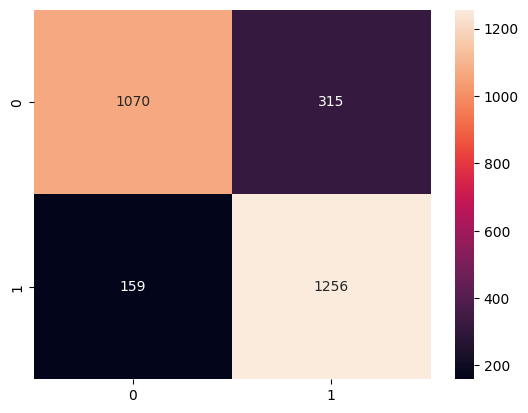

In [817]:
# put your answer here
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_validation, y_validation_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

20. Use `.predict()` to generate the model predictions using the **test dataset**


- Put all text validation data in **X_test** variable

- Convert **X_test** to its numerical form.

- Put the converted data to **X_test_transformed**

- Put all predictions in **y_test_pred** variable

In [818]:
# put your answer here
X_test = df_test['text']
X_test_transformed = vectorizer.transform(X_test)
y_test_pred = model.predict(X_test_transformed)

21. Get the Accuracy, Precision, Recall and F1-Score of the model using the **test dataset**

- Put all test data labels in **y_validation** variable



In [819]:
# put your answer here
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_test = df_test['label']

In [820]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8249110320284697
Precision: 0.7881679389312977
Recall: 0.8862660944206009
F1 Score: 0.8343434343434344


22. Create a confusion matrix using the **test dataset**

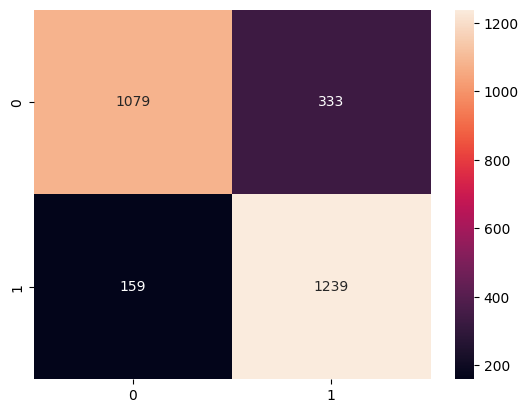

In [821]:
# put your answer here
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d')
plt.show()

## E. Test the model

23. Test the model by providing a non-hate speech input. The model should predict it as 0

In [822]:
input_text = ['Bet ko ang rosas.']
input_transformed = vectorizer.transform(input_text)
prediction = model.predict(input_transformed)
print(prediction)

[0]


24. Test the model by providing a hate speech input. The model should predict it as 1

In [823]:
# put your answer here
input_text = ['Sakalin kita dyan.']
input_transformed = vectorizer.transform(input_text)
prediction = model.predict(input_transformed)
print(prediction)

[1]
